In [72]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
all_data = pd.read_pickle('./data/no_singletons_data.pkl')

print(all_data)
# all_data = all_data.drop_duplicates(subset=['Team', 'Opponent'])
# all_data = all_data.groupby(['Team', 'Opponent'], as_index=False).mean()
# Group by 'Date', 'Team', and 'Opponent' 


all_data

                   Team          Opponent  Diff    Tm   Opp
0     Abilene Christian      Grand Canyon  -2.0  71.5  73.5
1     Abilene Christian          NC State -20.0  64.0  84.0
2     Abilene Christian        Western Ky  -2.0  84.0  86.0
4             Air Force       Boise State -34.5  52.0  86.5
5             Air Force    Colorado State  -9.0  71.0  80.0
...                 ...               ...   ...   ...   ...
1480         Washington  Washington State   1.5  80.5  79.0
1481        Weber State              Yale  10.0  75.0  65.0
1482   Western Illinois         Wisconsin -22.0  49.0  71.0
1483         Western Ky     Wichita State -10.0  61.0  71.0
1484         Western Ky      Wright State   7.0  91.0  84.0

[1391 rows x 5 columns]


,Team,Opponent,Diff,Tm,Opp
0,Abilene Christian,Grand Canyon,-2.0,71.5,73.5
1,Abilene Christian,NC State,-20.0,64.0,84.0
2,Abilene Christian,Western Ky,-2.0,84.0,86.0
4,Air Force,Boise State,-34.5,52.0,86.5
5,Air Force,Colorado State,-9.0,71.0,80.0
...,...,...,...,...,...
1480,Washington,Washington State,1.5,80.5,79.0
1481,Weber State,Yale,10.0,75.0,65.0
1482,Western Illinois,Wisconsin,-22.0,49.0,71.0
1483,Western Ky,Wichita State,-10.0,61.0,71.0


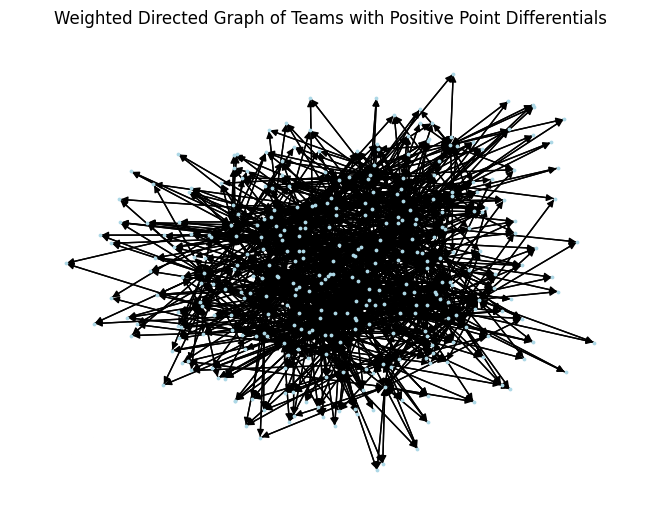

In [96]:
df = all_data.copy()

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the positive point differential
for index, row in df.iterrows():
    # if row['Diff'] > 0:
    G.add_edge(row['Team'], row['Opponent'], weight=row['Opp'])
    # else:
    G.add_edge(row['Opponent'], row['Team'], weight=row['Tm'])


# Draw the graph with edge labels (weights)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=3, node_color='lightblue', font_size=1, font_color='black', font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=10)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Weighted Directed Graph of Teams with Positive Point Differentials")
plt.show()


In [97]:
pagerank = nx.pagerank(G, weight='weight', max_iter=1000, alpha=0.85) 

# Print the weighted PageRank of each node 

lst = list(pagerank.items())
lst.sort(key=lambda x: -x[1])
# lst.sort()
# print(lst)
for node, rank in lst: 
    print(f"{node}: {rank:.4f}")

Alabama: 0.0117
Florida Atlantic: 0.0105
Tennessee: 0.0103
Kentucky: 0.0102
UConn: 0.0100
Duke: 0.0100
NC State: 0.0099
Illinois: 0.0099
Dayton: 0.0099
Purdue: 0.0098
UNC: 0.0098
Iowa State: 0.0096
Baylor: 0.0096
James Madison: 0.0095
Clemson: 0.0095
UAB: 0.0095
Auburn: 0.0093
Florida: 0.0093
Arizona: 0.0093
Duquesne: 0.0093
Texas: 0.0092
Houston: 0.0092
TCU: 0.0092
Texas Tech: 0.0090
Kansas: 0.0090
BYU: 0.0089
Samford: 0.0088
Colorado: 0.0086
Michigan State: 0.0086
Marquette: 0.0084
Creighton: 0.0084
Texas A&M: 0.0084
Gonzaga: 0.0083
Mississippi State: 0.0083
Northwestern: 0.0083
Grand Canyon: 0.0082
South Carolina: 0.0082
San Diego State: 0.0082
Nebraska: 0.0081
Oregon: 0.0080
Utah State: 0.0080
Nevada: 0.0080
Wisconsin: 0.0080
Drake: 0.0079
Washington State: 0.0079
Western Ky: 0.0077
New Mexico: 0.0076
College of Charleston: 0.0076
Saint Marys: 0.0075
Colorado State: 0.0075
Howard: 0.0075
Long Beach State: 0.0074
Montana State: 0.0073
Oakland: 0.0073
Yale: 0.0073
McNeese State: 0.00